In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0
total_spend,200.0,200.8605,92.985181,11.7,123.550,207.35,281.125,433.6


In [28]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [29]:
df['total_spend']= df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

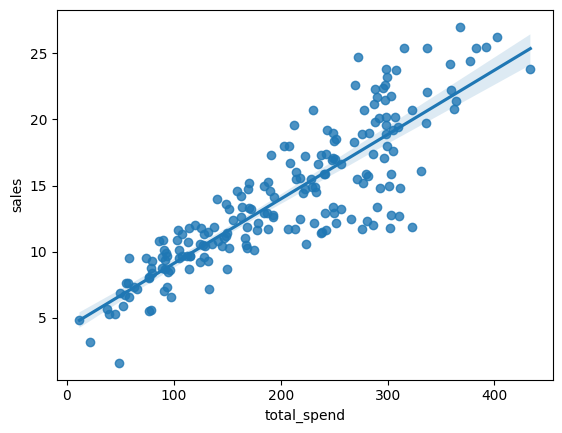

In [30]:
sns.regplot(data = df , x= 'total_spend' , y = 'sales')

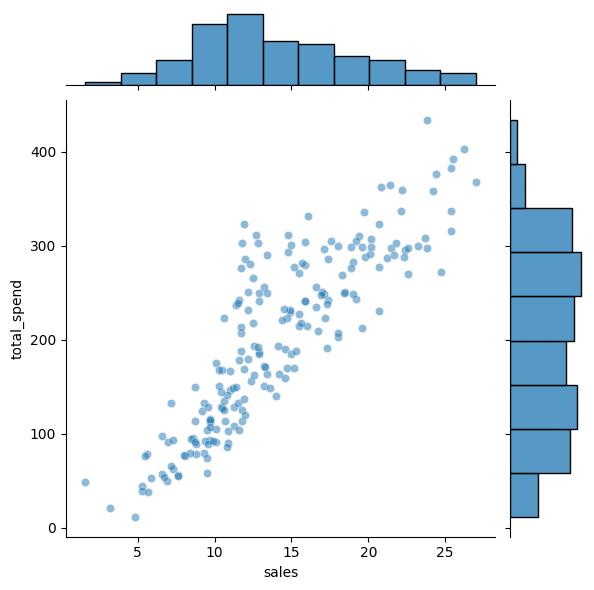

In [31]:
sns.jointplot(x='sales', y='total_spend', data=df, alpha=0.5)

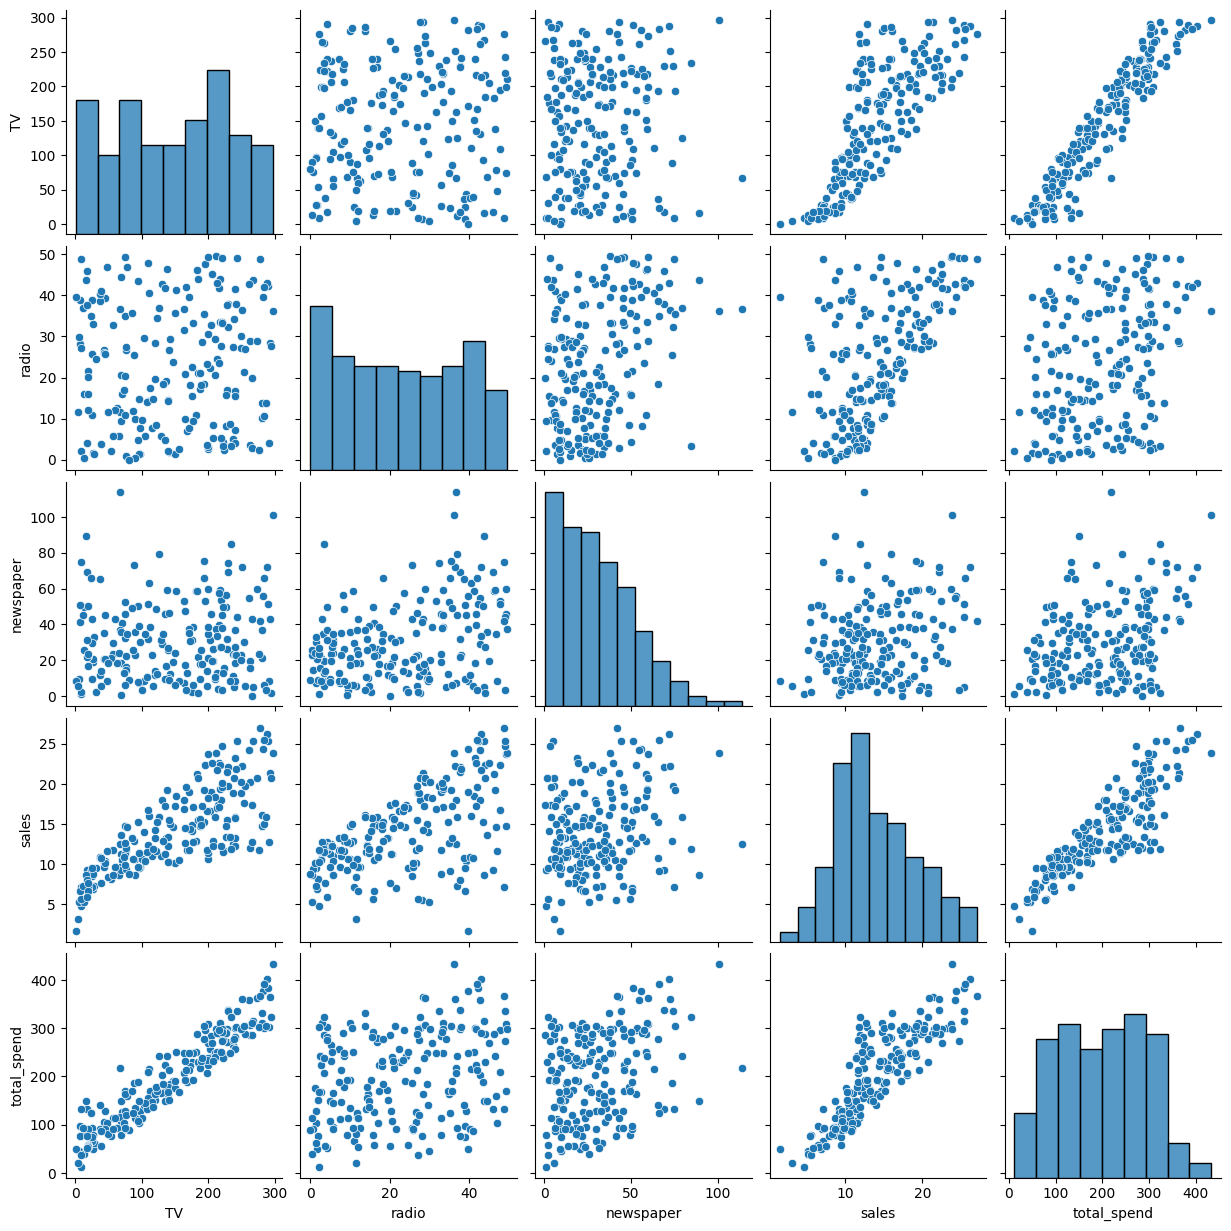

In [32]:
sns.pairplot(df)

In [33]:

a = ['total_spend', "sales"]
X = df.drop(a, axis = 1)
y = df['sales']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
model = lr.fit(X_train,y_train)

LinearRegression()

In [39]:
predictions = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mae = mean_absolute_error(y_test,predictions)
mae

1.4607567168117606

In [42]:
# Gerçek değer ile modelin tahminleri arasındaki uyumun bir ölçüsüdür. Gerçek değerlerin varyansının, tahmin edilen değerlerin varyansına oranlanması ile bulunmaktadır.
r2 = lr.score(X,y)
r2

0.8966643473004003

In [43]:
mse = mean_squared_error(y_test,predictions)
mse

3.1740973539761046

In [44]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
rmse

1.7815996615334502

In [45]:
test_residuals = y_test - predictions
test_residuals

95     0.491976
15     1.510118
30    -0.153843
158   -3.308503
128    2.587627
115   -0.505592
69     1.242808
170    0.938990
174   -2.106346
45    -0.255070
66     0.451680
182    2.046717
165   -2.445545
78    -3.603493
186    0.610410
177   -0.464944
56    -3.236284
152    0.334927
82     1.022404
68     0.068909
124    0.139633
16    -0.751035
148   -1.436207
93     0.893049
65     1.472597
60     2.290426
84     0.942468
67     1.418619
125    1.416504
132   -2.806699
9     -1.866468
18     1.296623
55     2.312329
75    -3.549664
150   -2.166615
104    0.562337
135   -2.455140
137   -0.054112
164    0.882556
76     2.331004
Name: sales, dtype: float64

In [46]:
preds = {"test_value" : y_test , "pred_value" : predictions,"residuals" : test_residuals, "mae":mae, "mse":mse, "rmse":rmse,"r2":r2}
preds_df = pd.DataFrame(preds)


In [47]:
preds_df.head().reset_index()

,index,test_value,pred_value,residuals,mae,mse,rmse,r2
0,95,16.9,16.408024,0.491976,1.460757,3.174097,1.7816,0.896664
1,15,22.4,20.889882,1.510118,1.460757,3.174097,1.7816,0.896664
2,30,21.4,21.553843,-0.153843,1.460757,3.174097,1.7816,0.896664
3,158,7.3,10.608503,-3.308503,1.460757,3.174097,1.7816,0.896664
4,128,24.7,22.112373,2.587627,1.460757,3.174097,1.7816,0.896664


In [48]:
final_model = LinearRegression()

In [49]:
final_model.fit(X,y)

LinearRegression()

In [50]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [31]:
 from joblib import dump,load

In [32]:
dump(final_model,("linear_reg_model2.joblib"))

['linear_reg_model.joblib']

In [33]:
loaded_model = load("linear_reg_model2.joblib")